First, we use webscraping to find information about the firms in the S&P 500.

In [2]:
# import the required libraries
import requests
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
# sending a request to the site
page = requests.get(url)
# parsing the content
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', {'class': 'wikitable sortable'})


Using Pandas, we cleaned the data to produce a DataFrame containing only the relevant information for each firm - which is their sector

In [3]:
import pandas as pd
# Extract data from wikipedia 
rows = table.find_all('tr')
data_list = []
for row in rows:
    data = row.find_all('td')
    try:
        company = data[0].find('a').get_text()
        sector = data[3].get_text()
        data_list.append([company, sector])
    except:
        pass

# Create DataFrame
df = pd.DataFrame(data_list, columns=['Company', 'Sector'])
print(df)

    Company                  Sector
0       MMM             Industrials
1       AOS             Industrials
2       ABT             Health Care
3      ABBV             Health Care
4       ACN  Information Technology
..      ...                     ...
498     YUM  Consumer Discretionary
499    ZBRA  Information Technology
500     ZBH             Health Care
501    ZION              Financials
502     ZTS             Health Care

[503 rows x 2 columns]


Finding the sectors that are represented by the firms in the index

In [4]:
df['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

Finding how many firms there are from each sector in the index

In [5]:
# Group data by sector and count the number of firms in each sector
sector_count = df.groupby('Sector').size()
# Convert this dataframe to a dictionary
sector_count = sector_count.to_dict()
#Counting the number of firms per sector
sector_count = df['Sector'].value_counts()
sector_count

Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    25
Energy                    23
Name: Sector, dtype: int64

Plotting this information in a bar chart using matplotlib

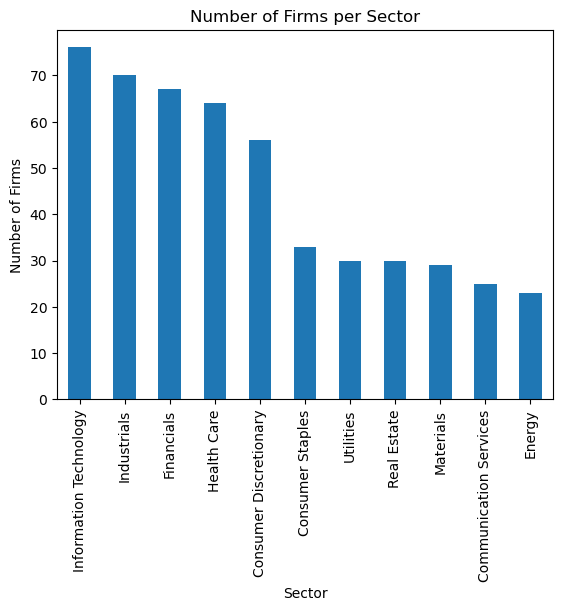

In [6]:
import matplotlib.pyplot as plt
sector_count.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Number of Firms')
plt.title('Number of Firms per Sector')
plt.show()

Showing the proportion of industries in the index

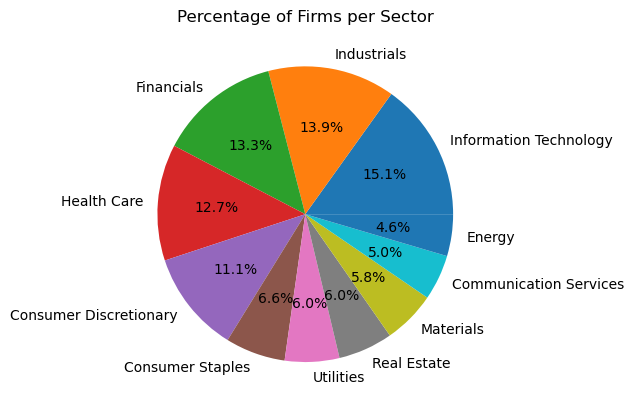

In [7]:
import matplotlib.pyplot as plt

plt.pie(sector_count, labels=sector_count.index, autopct='%1.1f%%')
plt.title('Percentage of Firms per Sector')
plt.show()


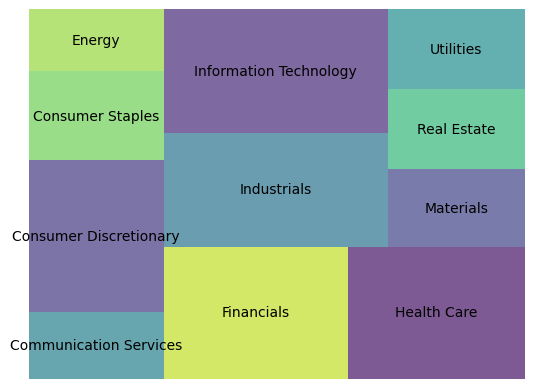

In [11]:
import squarify
import matplotlib.pyplot as plt

# Group the data by sector and count the number of companies in each sector
sector_count = df.groupby('Sector').size().reset_index(name='counts')

# Plot the treemap
squarify.plot(sizes=sector_count['counts'], label=sector_count['Sector'], alpha=.7)

# Show the plot
plt.axis('off')
plt.show()
